## Model validation with synthetically generated data

In [24]:
import os
import csv
import random
import numpy as np
import ipyvolume as ipv
%matplotlib inline

In [25]:
'''
Usage: To read a file with x,y,z coordinates, and store the data for each dimension in a separate array.
params: filename - File with x,y,z cooridnates
returns: 3 arrays with x's, y's and z's
'''
def getPoints(filename):
    x = list(); y = list(); z = list()
    with open (filename, 'r') as csv_file:
        csv_reader = csv.reader (csv_file)
        for line in csv_reader:
            x.append(line[0]); y.append(line[1]); z.append(line[2])
    x = np.array(x, dtype = float); y = np.array(y, dtype = float); z = np.array(z, dtype = float)
    return (x, y, z)    

'''
Usage: To read the file with helix parameters 
returns: each helix parameter in a separate array 
'''
def getParams(filename):
    r2 = list(); pi2 = list(); ph2 = list(); rse2 = list(); pise2 = list(); phse2 = list()
    r3 = list(); pi3 = list(); ph3 = list(); rse3 = list(); pise3 = list(); phse3 = list()
    with open (filename, 'r') as csv_file:
        csv_reader = csv.reader (csv_file)
        for line in csv_reader:
            r2.append(line[0]); pi2.append(line[1]); ph2.append(line[2])
            rse2.append(line[3]); pise2.append(line[4]); phse2.append(line[5])
            r3.append(line[6]); pi3.append(line[7]); ph3.append(line[8])
            rse3.append(line[9]); pise3.append(line[10]); phse3.append(line[11])
    r2 = np.array(r2, dtype = float); pi2 = np.array(pi2, dtype = float); ph2 = np.array(ph2, dtype = float)
    rse2 = np.array(rse2, dtype = float); pise2 = np.array(pise2, dtype = float); phse2 = np.array(phse2, dtype = float)
    r3 = np.array(r3, dtype = float); pi3 = np.array(pi3, dtype = float); ph3 = np.array(ph3, dtype = float)
    rse3 = np.array(rse3, dtype = float); pise3 = np.array(pise3, dtype = float); phse3 = np.array(phse3, dtype = float)
    return (r2, pi2, ph2, rse2, pise2, phse2, r3, pi3, ph3, rse3, pise3, phse3)
'''
Usage: To generate a helix consisting of numPoints, with a given radius, pitch 
       and percent spatial error. 
returns: 3 arrays with x,y,z coordinates of points along the helix 
'''
def generatePopulation(numPoints, radius, pitch, p_error):
    #Generating spatial error
    posErrorx = np.random.normal(0, (p_error/100)*radius, numPoints)
    posErrory = np.random.normal(0, (p_error/100)*radius, numPoints)
    posErrorz = np.random.normal(0, (p_error/100)*pitch, numPoints)

    #Generate a helix with the z axis as the long axis.
    #Read this for math background: (http://mathworld.wolfram.com/Helix.html)
    t = np.linspace(0, 8*np.pi, numPoints) #controls number of helical turns 
    x = radius*np.cos(t) + posErrorx
    y = radius*np.sin(t) + posErrory
    z = (pitch/(2*np.pi))*t + posErrorz
    return (x,y,z)
'''
Usage: To vizualize the synthetically generated populations 
returns: none
'''
def viz(x,y,z):
    fig = ipv.figure()
    ipv.style.use('dark')
    scatter = ipv.scatter(x,y,z, marker = 'sphere', color = 'blue', size = 5)
    ipv.show()
    return 

In [34]:
#Generate and vizualize population 
numPoints = 10000; radius = 3; pitch = 14; p_error = 15 
x,y,z = generatePopulation(numPoints, radius, pitch, p_error)
viz(x,y,z)
numBoot = 5000  
numSamples = 200 #number of samples to pick for each run of curve fitting 

In [35]:
#BOOTSTRAPPING
#Read this article for background: https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/

from sklearn.utils import resample
data = list(zip(x, y, z))
#Delete params output file before next run
if os.path.exists("params.csv"): os.remove('params.csv')
for i in range(0,numBoot):
    boot = resample(data, replace = True, n_samples = numSamples)
    #Split chosen coordinates into separate lists for curve fitting/viz
    xBoot, yBoot, zBoot = zip(*boot)
    xBoot = np.array(xBoot, dtype=float); yBoot = np.array(yBoot, dtype=float); zBoot = np.array(zBoot, dtype=float)
    #viz(xBoot, yBoot, zBoot)
    #Write coordinates to a file
    #Delete old input file 
    if os.path.exists("input.csv"): os.remove('input.csv')
    np.savetxt("input.csv", np.column_stack((xBoot, yBoot, zBoot)), delimiter=",", fmt='%s')
    #Create 2D projections 
    %run Project2D.py
    #curve fit 
    %run CurveFit.py

<Figure size 432x288 with 0 Axes>

In [36]:
#Plot params
y = list(range(1,numBoot+1))
r2,pi2,ph2,rse2,pise2,phse2,r3,pi3,ph3,rse3,pise3,phse3 = getParams("params.csv")

Text(0.5,1,'Radius se c1c3')

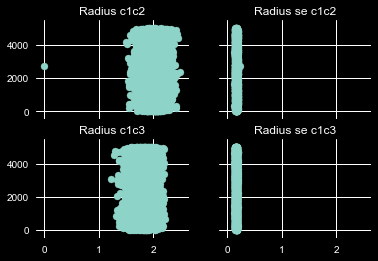

In [37]:
import matplotlib.pyplot as plt
#plt.scatter(r2, y, c='b',s=100); plt.title('Radius'); plt.xlim(2, 8); plt.show(); plt.close()
#plt.scatter(rse2, y, c='g',s=100); plt.title('Radius standard error'); plt.show(); plt.close()

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
plt.style.use('dark_background')
axs[0, 0].scatter(r2, y)
axs[0, 0].set_title('Radius c1c2')
axs[0, 1].scatter(rse2, y)
axs[0, 1].set_title('Radius se c1c2')
axs[1, 0].scatter(r3, y)
axs[1, 0].set_title('Radius c1c3')
axs[1, 1].scatter(rse3, y)
axs[1, 1].set_title('Radius se c1c3')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

Text(0.5,1,'Pitch se c1c3')

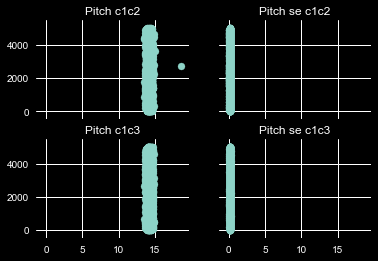

In [38]:
#plt.scatter(pi, y, c='b',s=100); plt.title('Pitch'); plt.xlim(11, 17); plt.show(); plt.close()
#plt.scatter(pise, y, c='g',s=100); plt.title('Pitch standard error'); plt.show(); plt.close()

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
plt.style.use('dark_background')
axs[0, 0].scatter(pi2, y)
axs[0, 0].set_title('Pitch c1c2')
axs[0, 1].scatter(pise2, y)
axs[0, 1].set_title('Pitch se c1c2')
axs[1, 0].scatter(pi3, y)
axs[1, 0].set_title('Pitch c1c3')
axs[1, 1].scatter(pise3, y)
axs[1, 1].set_title('Pitch se c1c3')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

Text(0.5,1,'Phase se c1c3')

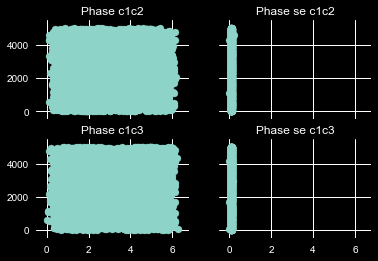

In [32]:
#plt.scatter(ph, y, c='b',s=100); plt.title('Phase'); plt.show(); plt.close()
#plt.scatter(phse, y, c='g',s=100); plt.title('Phase standard error'); plt.show(); plt.close()

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
plt.style.use('dark_background')
axs[0, 0].scatter(ph2, y)
axs[0, 0].set_title('Phase c1c2')
axs[0, 1].scatter(phse2, y)
axs[0, 1].set_title('Phase se c1c2')
axs[1, 0].scatter(ph3, y)
axs[1, 0].set_title('Phase c1c3')
axs[1, 1].scatter(phse3, y)
axs[1, 1].set_title('Phase se c1c3')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

In [167]:
#xo, yo, zo = getPoints("outlierFit.csv");
#Vizualization - Fig3 - outlier
#fig = ipv.figure()
#ipv.style.use('dark')
#scatter = ipv.scatter(xo,yo,zo, marker = 'sphere', color = 'blue', size = 5)
#ipv.show()

In [9]:
#import statistics
#Removing outliers based on standard error in the radius
rse = (rse2 + rse3)/2
rse_mean = statistics.mean(rse)
rse_sd = statistics.stdev(rse)
print("Mean of standard error in the radius:", rse_mean)
print("Std Dev of standard error in the radius:", rse_sd)
threshold = rse_mean + 2*(rse_sd)
print("threshold: ",threshold)
#Detecting positions of outliers
pos_outliers = [r for r in range(len(rse)) if rse[r] > threshold]
print(pos_outliers)
print("Percent outliers: ",(len(pos_outliers)/numBoot)*100)
for i in sorted(pos_outliers, reverse=True): #removing in reverse order
    r2 = np.delete(r2, i);pi2 = np.delete(pi2, i);ph2 = np.delete(ph2, i)
    rse2 = np.delete(rse2, i);pise2 = np.delete(pise2, i);phse2 = np.delete(phse2, i)
    r3 = np.delete(r3, i);pi3 = np.delete(pi3, i);ph3 = np.delete(ph3, i)
    rse3 = np.delete(rse3, i);pise3 = np.delete(pise3, i);phse3 = np.delete(phse3, i) 

Mean of standard error in the radius: 0.12736682663310547
Std Dev of standard error in the radius: 0.005115540670354188
threshold:  0.13759790797381385
[13, 53, 98, 100, 145, 186, 232, 305, 320, 349, 390, 406, 529, 532, 536, 637, 704, 747, 767, 795, 808, 826, 833, 881, 908, 933, 1000, 1027, 1087, 1095, 1106, 1137, 1191, 1255, 1276, 1422, 1455, 1496, 1506, 1533, 1683, 1703, 1839, 1843, 1852, 1904, 1938, 2087, 2110, 2133, 2214, 2249, 2361, 2371, 2526, 2593, 2649, 2671, 2682, 2714, 2729, 2751, 2780, 2821, 2856, 2951, 3004, 3041, 3104, 3132, 3191, 3223, 3269, 3287, 3338, 3410, 3461, 3498, 3560, 3794, 3819, 3926, 3947, 3970, 4012, 4099, 4114, 4164, 4217, 4250, 4327, 4352, 4364, 4380, 4400, 4406, 4444, 4586, 4603, 4658, 4697, 4714, 4719, 4781, 4784, 4886, 4898, 4976, 5020, 5073, 5076, 5104, 5208, 5212, 5228, 5346, 5347, 5365, 5433, 5451, 5592, 5718, 5813, 5954, 5994, 6077, 6112, 6121, 6145, 6158, 6199, 6218, 6224, 6225, 6231, 6280, 6291, 6356, 6527, 6536, 6643, 6656, 6702, 6764, 6804, 6829, 

Text(0.5,1,'Radius se c1c3')

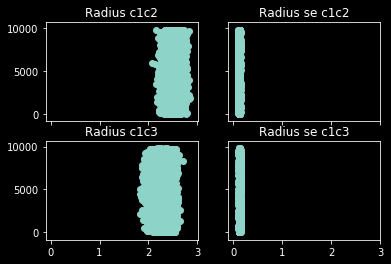

In [12]:
#Re-plotting w/o outliers 
y = list(range(1,len(r2) + 1))
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
plt.style.use('dark_background')
axs[0, 0].scatter(r2, y)
axs[0, 0].set_title('Radius c1c2')
axs[0, 1].scatter(rse2, y)
axs[0, 1].set_title('Radius se c1c2')
axs[1, 0].scatter(r3, y)
axs[1, 0].set_title('Radius c1c3')
axs[1, 1].scatter(rse3, y)
axs[1, 1].set_title('Radius se c1c3')

Text(0.5,1,'Pitch se c1c3')

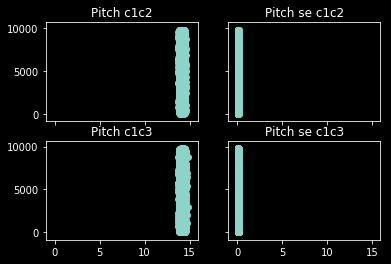

In [13]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
plt.style.use('dark_background')
axs[0, 0].scatter(pi2, y)
axs[0, 0].set_title('Pitch c1c2')
axs[0, 1].scatter(pise2, y)
axs[0, 1].set_title('Pitch se c1c2')
axs[1, 0].scatter(pi3, y)
axs[1, 0].set_title('Pitch c1c3')
axs[1, 1].scatter(pise3, y)
axs[1, 1].set_title('Pitch se c1c3')

In [14]:
#fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
#plt.style.use('dark_background')
#axs[0, 0].scatter(ph2, y)
#axs[0, 0].set_title('Phase c1c2')
#axs[0, 1].scatter(phse2, y)
#axs[0, 1].set_title('Phase se c1c2')
#axs[1, 0].scatter(ph3, y)
#axs[1, 0].set_title('Phase c1c3')
#axs[1, 1].scatter(phse3, y)
#axs[1, 1].set_title('Phase se c1c3')

In [1]:
#Histogram
#Trying seaborn for better plots
import seaborn as sns 
sns.set()
_=plt.hist(r2, bins = 10)
_=plt.xlabel("radius c1c2")
_=plt.ylabel("Number of samples")
plt.show()
plt.savefig('abc.png')

NameError: name 'plt' is not defined

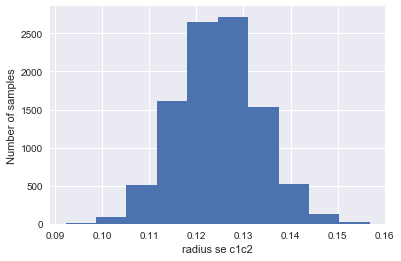

In [16]:
_=plt.hist(rse2, bins = 10)
_=plt.xlabel("radius se c1c2")
_=plt.ylabel("Number of samples")
plt.show()

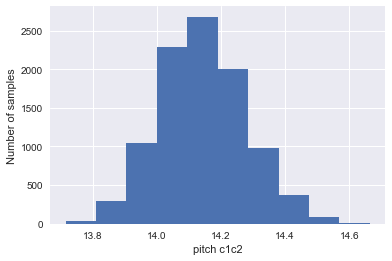

In [17]:
_=plt.hist(pi2, bins = 10)
_=plt.xlabel("pitch c1c2")
_=plt.ylabel("Number of samples")
plt.show()

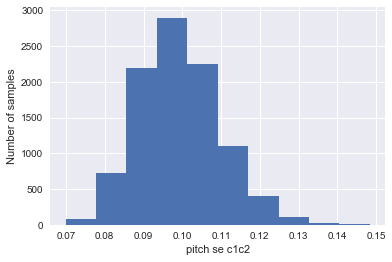

In [18]:
_=plt.hist(pise2, bins = 10)
_=plt.xlabel("pitch se c1c2")
_=plt.ylabel("Number of samples")
plt.show()

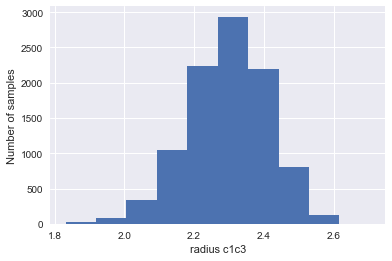

In [19]:
_=plt.hist(r3, bins = 10)
_=plt.xlabel("radius c1c3")
_=plt.ylabel("Number of samples")
plt.show()

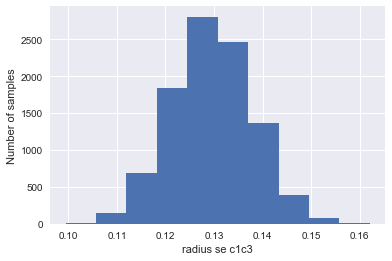

In [20]:
_=plt.hist(rse3, bins = 10)
_=plt.xlabel("radius se c1c3")
_=plt.ylabel("Number of samples")
plt.show()

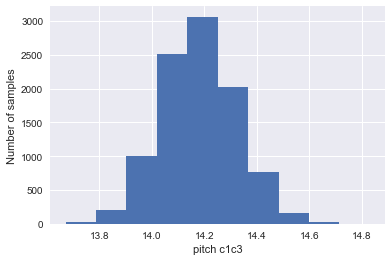

In [21]:
_=plt.hist(pi3, bins = 10)
_=plt.xlabel("pitch c1c3")
_=plt.ylabel("Number of samples")
plt.show()

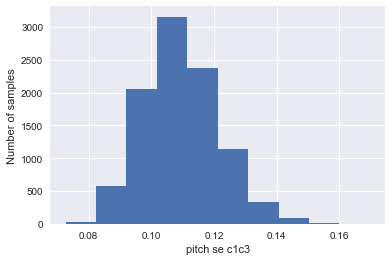

In [22]:
_=plt.hist(pise3, bins = 10)
_=plt.xlabel("pitch se c1c3")
_=plt.ylabel("Number of samples")
plt.show()

## Estimating the 95% confidence interval
(95% of all sample radii/pitch are in the 95% confidence interval)
- We are estimating a margin of error for the sample parameters, radius and pitch, from their sampling distributions. 
- We can do this by estimating the 95% confidence intervals of the sampling distributions. 
- We can use the Student's T-distribution. Note that there is a T-distribution for every sample size.
- For our current setup, the degrees of freedom (df) is 199 (sample size - 1).
- From the T-distribution table (column - 0.025 (one tail) 0.05 (two tails)), t for df = 199 is 1.96. Note that this is the same as z from the Z-distribution because the sample size is large.

How to interpret the 95% confidence interval? - It is the probability that the sample statistic of sample size n is within a certain distance of the true population. 

### Things to keep in mind:
- The confidence interval IS NOT the probability that the population mean lies within the interval. 

Upper boundary 2.682577367006788


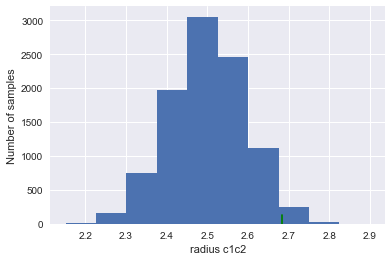

In [180]:
mean_r2 = statistics.mean(r2) #Mean of sampling distribution 
sd_r2 = statistics.stdev(r2)#Standard error in the mean/sd of sampling distribution
upper_boundary_r2 = mean_r2 + (1.96*sd_r2)
lower_boundary_r2 = mean_r2 - (1.96*sd_r2)
_=plt.hist(r2, bins = 10)
_=plt.xlabel("radius c1c2")
_=plt.ylabel("Number of samples")
print("Upper boundary",upper_boundary_r2)
#print("Lower boundary",lower_boundary_r2)
x_upper = [upper_boundary_r2]*125
#x_lower = [lower_boundary_r2]*125
y = list(range(0, 125))
plt.plot(x_upper,y, '-g')
#plt.plot(x_lower,y, '-g')
plt.show()

Upper boundary 0.14032709103912885


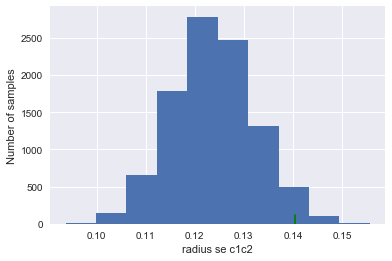

In [181]:
mean_rse2 = statistics.mean(rse2) #Mean of sampling distribution 
sd_rse2 = statistics.stdev(rse2)#Standard error in the mean/sd of sampling distribution
upper_boundary_rse2 = mean_rse2 + (1.96*sd_rse2)
lower_boundary_rse2 = mean_rse2 - (1.96*sd_rse2)
_=plt.hist(rse2, bins = 10)
_=plt.xlabel("radius se c1c2")
_=plt.ylabel("Number of samples")
print("Upper boundary",upper_boundary_rse2)
#print("Lower boundary",lower_boundary_rse2)
x_upper = [upper_boundary_rse2]*125
#x_lower = [lower_boundary_rse2]*125
y = list(range(0, 125))
plt.plot(x_upper,y, '-g')
#plt.plot(x_lower,y, '-g')
plt.show()

Upper boundary 2.503152366141737


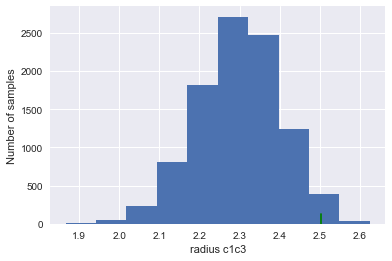

In [182]:
mean_r3 = statistics.mean(r3) #Mean of sampling distribution 
sd_r3 = statistics.stdev(r3)#Standard error in the mean/sd of sampling distribution
upper_boundary_r3 = mean_r3 + (1.96*sd_r3)
#lower_boundary_r3 = mean_r3 - (1.96*sd_r3)
_=plt.hist(r3, bins = 10)
_=plt.xlabel("radius c1c3")
_=plt.ylabel("Number of samples")
print("Upper boundary",upper_boundary_r3)
#print("Lower boundary",lower_boundary_r2)
x_upper = [upper_boundary_r3]*125
#x_lower = [lower_boundary_r3]*125
y = list(range(0, 125))
plt.plot(x_upper,y, '-g')
#plt.plot(x_lower,y, '-g')
plt.show()

Upper boundary 0.14314475423471443


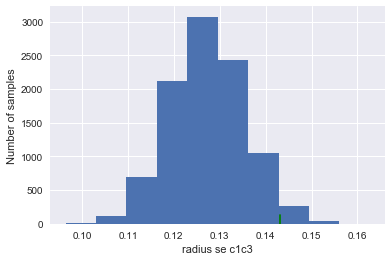

In [183]:
mean_rse3 = statistics.mean(rse3) #Mean of sampling distribution 
sd_rse3 = statistics.stdev(rse3)#Standard error in the mean/sd of sampling distribution
upper_boundary_rse3 = mean_rse3 + (1.96*sd_rse3)
lower_boundary_rse3 = mean_rse3 - (1.96*sd_rse3)
_=plt.hist(rse3, bins = 10)
_=plt.xlabel("radius se c1c3")
_=plt.ylabel("Number of samples")
print("Upper boundary",upper_boundary_rse3)
#print("Lower boundary",lower_boundary_rse2)
x_upper = [upper_boundary_rse3]*125
#x_lower = [lower_boundary_rse2]*125
y = list(range(0, 125))
plt.plot(x_upper,y, '-g')
#plt.plot(x_lower,y, '-g')
plt.show()

In [184]:
mean_upper_boundary = (upper_boundary_rse2 + upper_boundary_rse3)/2
print("Mean upper boundary: ", mean_upper_boundary)

Mean upper boundary:  0.14173592263692164


In [156]:
#Vizualizing something inside the boundary
x_in, y_in, z_in = getPoints("inBoundary.csv");
fig = ipv.figure()
ipv.style.use('dark')
scatter = ipv.scatter(x_in,y_in,z_in, marker = 'sphere', color = 'blue', size = 5)
ipv.show()

FileNotFoundError: [Errno 2] No such file or directory: 'inBoundary.csv'

In [157]:
#Vizualizing something inside the boundary
x_out, y_out, z_out = getPoints("outOfBoundary.csv");
fig = ipv.figure()
ipv.style.use('dark')
scatter = ipv.scatter(x_out,y_out,z_out, marker = 'sphere', color = 'blue', size = 5)
ipv.show()

FileNotFoundError: [Errno 2] No such file or directory: 'outOfBoundary.csv'